In [114]:
import matplotlib.pyplot as plt
import polars as pl
import json
import polyline

In [115]:
%config InteractiveShell.ast_node_interactivity = 'last_expr_or_assign'

In [116]:
#Load patterns data
pattern_mapping = {
    3: "2L",
    4: "2R",
    37: "3",
    17: "10",
    18: "11",
    23: "12",
    12: "16",
    13: "17",
    14: "18",
    33: "19",
    46: "21",
    45: "21 Tripper",
}

# Load patterns json
file = open("../data/patterns.json", "r")
patternsData = json.load(file)

patterns = pl.DataFrame(patternsData['get_patterns'])
patterns = patterns.with_columns(pl.col("id").replace_strict(pattern_mapping, default="None"))
patterns

id,name,extID,type,length,color,encLine,decLine,routes,routeNames,stations,stopIDs
str,str,str,i64,f64,str,str,list[null],list[i64],list[str],list[null],list[i64]
"""2L""","""Route 2L (Full Service)""","""2""",2,5.156097,"""#097138""","""eq}~Fxix|OM?a@@}A??fE?nEAbE?h@…",[],[3],"[""Route 2L""]",[],"[433, 465, … 820]"
"""2R""","""Route 2R Full Service""","""1""",1,5.083211,"""#FFD600""","""qk}~Fn{x|Ow@C{BhAoBp@Em@G}G@_I…",[],[4],"[""Route 2R""]",[],"[431, 451, … 432]"
"""3""","""Route 3 Full Service""","""3""",2,2.793036,"""#58F964""","""kq}~Fxix|Oa@??@sA?@?C?A}C???aC…",[],[33],"[""Route 3""]",[],"[431, 493, … 431]"
"""10""","""Route 10 Full Service""","""10""",3,5.564219,"""#782BC9""","""{q}~Fxix|OuBACfF@jH@xClFkBj@Sj…",[],[17],"[""Route 10""]",[],"[477, 432, … 431]"
"""11""","""Route 11 Full Service""","""11""",2,12.793737,"""#A07D5C""","""mq}~F~ix|O}A?QECKEaPAoACmQGGeR…",[],[18],"[""Route 11""]",[],"[492, 431, … 491]"
…,…,…,…,…,…,…,…,…,…,…,…
"""17""","""Route 17 Full Service""","""17""",2,11.542563,"""#3E5BA6""","""ap}~Fjkx|OHOAYQGu@B_B?K}]?_M`B…",[],[13],"[""Route 17""]",[],"[805, 806, … 805]"
"""18""","""Route 18 Full Service""","""18""",4,14.597877,"""#FFAA00""","""}i`_G|no|OoA}Aa@]gAKCB[~BUp@c@…",[],[14],"[""Route 18""]",[],"[676, 835, … 685]"
"""19""","""Route 19 Full Service""","""19""",4,21.596067,"""#34ADE0""","""cm}~Fj_y|Ol@CRUFW?_@??ESOQ??WI…",[],[30],"[""Route 19""]",[],"[819, 528, … 819]"


In [117]:
#Load stops data
file = open("../data/stops.json", "r")
stopsData = json.load(file)

stops = pl.DataFrame(stopsData['get_stops'])

rid,rsid,id,name,lat,lng,extID,shortName
i64,i64,i64,str,f64,f64,str,str
3,197057,449,"""Anderson Hall""",41.938465,-88.761086,"""449""","""449"""
3,197056,448,"""Barsema Hall""",41.939774,-88.761009,"""448""","""448"""
3,197054,446,"""Castle Dr. at College Ave.""",41.93412,-88.763115,"""446""","""446"""
3,197053,445,"""Castle Dr. at Montgomery""",41.9324,-88.762863,"""445""","""445"""
3,197044,436,"""Convocation Center Entrance 3""",41.936459,-88.785286,"""436""","""436"""
…,…,…,…,…,…,…,…
38,2491136,768,"""Maple St. at DeKalb County Cou…",41.989391,-88.685707,"""""","""DCC"""
38,2491159,791,"""Meijer Grocery Store (On Deman…",41.98642,-88.711739,"""""","""MGS"""
38,2491157,789,"""Thornwood Dr. & Prairie Rd.""",41.972488,-88.698242,"""""","""PRd"""


In [118]:
two_l_pattern = patterns.filter(pl.col("id") == "2L")
two_l_stops = two_l_pattern.select("stopIDs").to_series()[0]

""
i64
433
465
466
467
468
…
448
449
450


In [119]:
# Get full stops data
stops_df = stops.select([
    pl.col("id").alias("stop_id"),
    pl.col("name").cast(pl.Utf8).alias("stop_name"),
    pl.col("lat"),
    pl.col("lng")
])

# Filter stops to only include the Route 2L stops
stops_filtered = stops_df.filter(pl.col("stop_id").is_in(two_l_stops))

# Reorder them by the route pattern
ordered_stops = pl.DataFrame([
    stops_filtered.filter(pl.col("stop_id") == sid).to_dicts()[0]
    for sid in two_l_stops
    if sid in stops_filtered["stop_id"].to_list()
])

stop_id,stop_name,lat,lng
i64,str,f64,f64
433,"""Lincoln Hall""",41.936333,-88.774391
465,"""Stadium Dr. at New Hall""",41.937874,-88.775536
466,"""Grant North""",41.938599,-88.777321
467,"""Stevenson North""",41.937897,-88.78006
468,"""Stevenson South""",41.936558,-88.781105
…,…,…,…
448,"""Barsema Hall""",41.939774,-88.761009
449,"""Anderson Hall""",41.938465,-88.761086
450,"""Health Services on Lucinda Ave…",41.936481,-88.764244


In [120]:
# Decode the polyline → list of (lat, lng) tuples
enc_line = two_l_pattern.select("encLine").to_series()[0]
path_points = polyline.decode(enc_line)
lats, lngs = zip(*path_points)


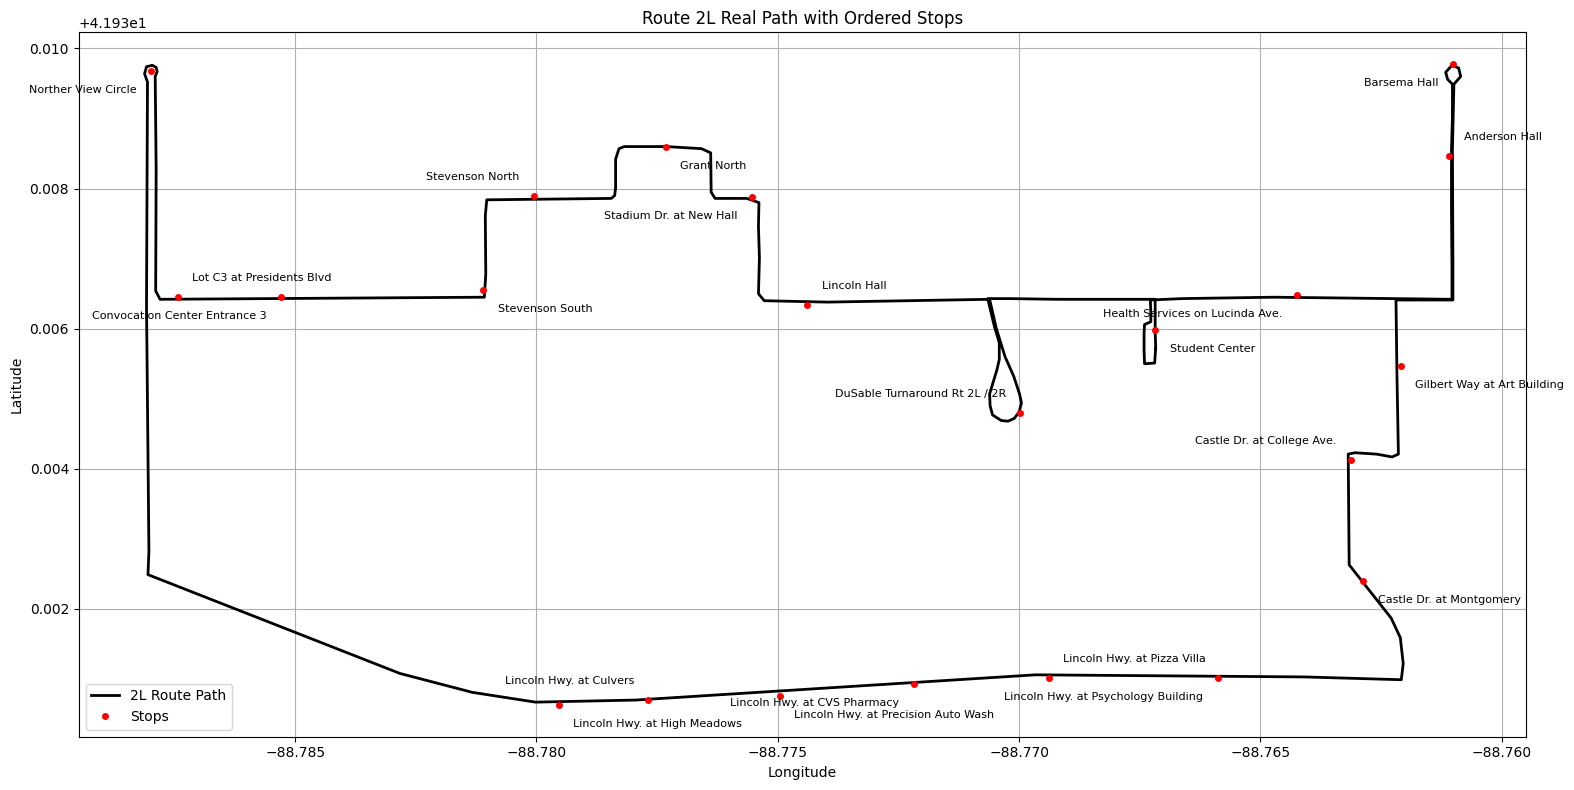

In [125]:
plt.figure(figsize=(16, 8))
plt.plot(lngs, lats, 'k-', linewidth=2, label="2L Route Path")

stop_lats = ordered_stops["lat"].to_list()
stop_lngs = ordered_stops["lng"].to_list()
stop_names = ordered_stops["stop_name"].to_list()

plt.plot(stop_lngs, stop_lats, 'ro', markersize=4, label="Stops")

# Improved label spacing to prevent overlaps
for i, (lat, lng, name) in enumerate(zip(stop_lats, stop_lngs, stop_names)):
    offset_x = 0.0003 if i % 2 == 0 else -0.0003
    offset_y = 0.0002 if i % 3 == 0 else -0.0002
    ha = 'left' if offset_x > 0 else 'right'
    va = 'bottom' if offset_y > 0 else 'top'
    plt.text(lng + offset_x, lat + offset_y, name, fontsize=8, ha=ha, va=va)

# === Final Touches ===
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Route 2L Real Path with Ordered Stops")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

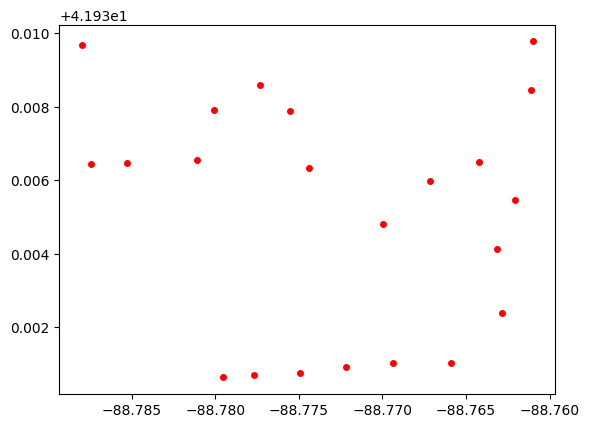

In [123]:
# Plot stops on top of route
stop_lats = ordered_stops["lat"].to_list()
stop_lngs = ordered_stops["lng"].to_list()
stop_names = ordered_stops["stop_name"].to_list()

plt.plot(stop_lngs, stop_lats, 'ro', markersize=4, label="Stops")